# __Brough Lecture Notes: Beginning Time Series Topics IV__

<br>

Finance 5330: Financial Econometrics <br>
Tyler J. Brough <br>
Last Updated: January 31, 2019 <br>
<br>

__Unit Roots Continued__

<br>

The random walk with drift

$$
x_{t} = \mu + x_{t-1} + \varepsilon_{t}
$$

<br>

where $\mu = E(x_{t} - x_{t-1}) = \mu$ and $\{\varepsilon_{t}\}$ is white noise. The constant term $\mu$ represents the time trend of $x_{t}$ and is called the drift. 

<br>

Assume the initial value of $x_{t}$ is $x_{0}$, then

$$
\begin{aligned}
x_{1}  &= \mu + x_{0} + \varepsilon_{1} \\
x_{2}  &= \mu + x_{1} + \varepsilon_{2} = 2 \mu + x_{0} + \varepsilon_{1} + \varepsilon_{2} \\
\vdots &= \quad \vdots \\
x_{t}  &= t \mu + x_{0} + \varepsilon_{t} + \varepsilon_{t-1} + \cdots + \varepsilon_{1} 
\end{aligned}
$$

<br>

The last equation shows that $\{x_{t}\}$ consists of a time trend $t\mu$ and a pure random-walk process $\sum\limits_{i=1}^{t} \varepsilon_{i}$.

<br>


$Var(\sum\limits_{i=1}^{t} \varepsilon_{i}) = t\sigma_{\varepsilon}^{2}$ where $\sigma_{\varepsilon}^{2}$ is the variance of $\varepsilon_{t}$.

<br>

The conditional standard deviation of $x_{t}$ is $\sqrt{t} \sigma_{\varepsilon}$, which grows at a slower rate than the conditional expectation of $x_{t}$. Therefore, if we graph $x_{t}$ against the time index $t$, we have a time trend with slope $\mu$

<br>

Let's look at some actual market data for IBM from 1947 to 1997.

<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
rawIBM = pd.read_csv("./data/IBM-1947-1997-CRSP.csv", parse_dates=True, index_col=1)
rawIBM.head()

,PERMNO,TICKER,COMNAM,PRC
date,,,,
1947-01-31,12490,NaN,INTERNATIONAL BUSINESS MACHS COR,221.0
1947-02-28,12490,NaN,INTERNATIONAL BUSINESS MACHS COR,211.0
1947-03-31,12490,NaN,INTERNATIONAL BUSINESS MACHS COR,208.5
1947-04-30,12490,NaN,INTERNATIONAL BUSINESS MACHS COR,193.5
1947-05-29,12490,NaN,INTERNATIONAL BUSINESS MACHS COR,200.0


In [5]:
rawIBM.tail()

,PERMNO,TICKER,COMNAM,PRC
date,,,,
1997-08-29,12490,IBM,INTERNATIONAL BUSINESS MACHS COR,101.375
1997-09-30,12490,IBM,INTERNATIONAL BUSINESS MACHS COR,106.000
1997-10-31,12490,IBM,INTERNATIONAL BUSINESS MACHS COR,98.500
1997-11-28,12490,IBM,INTERNATIONAL BUSINESS MACHS COR,109.500
1997-12-31,12490,IBM,INTERNATIONAL BUSINESS MACHS COR,104.625


<br>

Now let's convert to log-prices.

<br>

In [6]:
ibm = rawIBM.PRC.apply(np.log)

In [7]:
ibm.head()

date
1947-01-31    5.398163
1947-02-28    5.351858
1947-03-31    5.339939
1947-04-30    5.265278
1947-05-29    5.298317
Name: PRC, dtype: float64

In [8]:
ibm.tail()

date
1997-08-29    4.618827
1997-09-30    4.663439
1997-10-31    4.590057
1997-11-28    4.695925
1997-12-31    4.650383
Name: PRC, dtype: float64

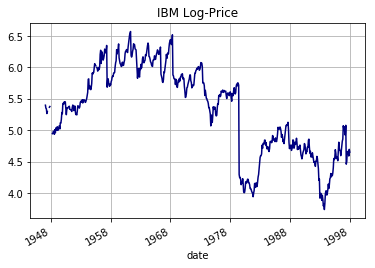

In [16]:
ibm.plot(grid=True, color="navy", title="IBM Log-Price")

<br>

A naive estimator for $\mu$ is as follows:

<br>

In [20]:
ibm.dropna(inplace=True)
ibm.values.mean()

5.322282595240228

<br>

If you look at the graph from 1947 to about 1960 you can clearly see variation around a positive trend.

<br>

__Trend-Stationary Time Series__

<br>

A closely related model that exhibits linear trend is the trend-stationary time series model:

$$
x_{t} = \beta_{0} + \beta_{1} t + z_{t}
$$

<br>

where $z_{t}$ is a stationary time series (e.g. a stationary AR(p) series). Here $x_{t}$ grows linearly in time with rate $\beta_{1}$ and hence can exhibit behavior similar to a random walk with drift. 

<br>

There is one major difference between the random walk with drift and the trend-stationary series: 

<br>

__Random Walk with Drift__

<br>

$$
\begin{aligned}
E(x_{t})  &= x_{0} + \mu t \quad \mbox{and} \\
Var(x_{t} &= t \sigma_{\varepsilon}^{2} 
\end{aligned}
$$

<br>

which clearly is not stationary because the variance is directly time dependent. While

<br>

__Trend-Stationary Series__

<br>

$$
\begin{aligned}
E(x_{t})  &= \beta_{0} + \beta_{1} t \quad \mbox{and} \\
Var(x_{t} &= Var(z_{t})
\end{aligned}
$$

which is finite and time-independent. 

<br>

__General Unit-Root Nonstationary Models__

<br>

Consider an ARMa model. If we extend the model by allowing the AR polynomial to have $1$ as a characteristic root, then the model becomes the Autoregressive Integrated Moving Average (ARIMA) model. 

<br>

An ARIMA model is said to be unit-root nonstationary because its AR polynomial has a unit root. 

<br>

A conventional approach for handling unit-root nonstationarity is differencing. 

<br>

__Differencing__

<br>

A time series $x_{t}$ is said to be an ARIMA(p,1,q) process if the change series

$$
c_{t} = x_{t} - x_{t-1} = (1 - L) x_{t}
$$

<br>

follows a stationary and invertible ARMA(p,q) process. 

<br>
<br>

__Ex:__ in finance price series are commonly believed to be nonstationary, but the log-return series $r_{t} = \ln{(p_{t})} - \ln{(p_{t-1})}$ is stationary. Here the price series $\{p_{t}\}$ is unit-root nonstationary and hence can be treated as an ARIMA process. 

<br>

The idea of transforming a nonstationary series into a stationary one by considering its change series is called _differencing_ in the time series literature.

<br>

Formally, $c_{t} = x_{t} - x_{t-1}$ is referred to as the first differenced series of $x_{t}$.

<br>

In some fields a time series $x_{t}$ may contain multiple unit roots. For example, if both $x_{t}$ and its first differenced series $c_{t} = x_{t} - x_{t-1}$ are unit-root nonstationary, but $s_{t} = c_{t} - c_{t-1} = x_{t} - 2 x_{t-1} + x_{t-2}$ is weakly stationary, then $x_{t}$ has double unit roots, and $s_{t}$ is the second differenced series of $x_{t}$.

<br>

If $s_{t}$ follows an ARMA(p,q) model then $x_{t}$ is an ARIMA(p, 2, q) process.

<br>

__Testing For Unit Roots__

<br>

__Q:__ Do economic variables such as GNP, employment, and interet rates tend to revert back to a long-run trend after a shock, or do they follow random walks?

<br>

The question is important for two reasons:

* If these variables follow random walks, a regression of one against another can lead to spurious results. 

<br>

For example, suppose two series are generated by independent random walks: 

$$
\begin{aligned}
x_{t} &= x_{t-1} + \epsilon_{t} \\
y_{t} &= y_{t-1} + \nu_{t}
\end{aligned}
$$

<br>

and $E(\epsilon_{t} \nu_{t}) = 0$ for all $t, s$.

<br>

Now suppose we run $y_{t}$ on $x_{t}$ by OLS

<br>

$$
y_{t} = \alpha + \beta x_{t} + u_{t}
$$

<br>

The assumptions underlying the CLRM are violated. In this case you tend to see "significant" $\beta$ more often than the OLS formula say you should.

<br>

* If affects our understanding of the economy and our ability to make forecasts: 

    - If a variable such as GNP follows a random walk, then the effects of a temporary shock (e.g. increase in oil prices or an increase in government spending)
      not dissapate after several years but will instead have permanent effects. 
    - If stock prices follow random walks they should not be forecastable.
    
<br>

__Nelson & Plosser__

<br>

NP found evidence that GNP and other macro variables behave like random walks. This spurred a huge literature to investigate whether or not economic and financial variables are random walks or are trend-reverting. Several of these studies show that many economic time series do appear to be random walks or at least have random walk components. 

<br>

Most of these studies use unit-root tests introduced by Dicky & Fuller (1979) JASA. 

<br>

Suppose we believe that a variable $Y_{t}$, which has been growing over time, can be described by the following equation:

<br>

$$
Y_{t} = \alpha + \beta t + \rho Y_{t-1} + \epsilon_{t}
$$

<br>

One possibility is that $Y_{t}$ has been growing because $Y_{t}$ has a positive time trend ($\beta > 0$) but would be stationary after detrending (i.e. $\rho < 1$) In this case $Y_{t}$ could be used in a regression and all of the results and tests of the CLRM would apply. 

<br>

Another possibility is that $Y_{t}$ has been growing because it follows a random walk with a positive drift (i.e. $\alpha > 0$, $\beta = 0$, and $\rho = 1$). In this case we would need to work with $\Delta Y_{t}$ (change series).

<br>

Detrending would not make the series stationary, and the inclusion of $Y_{t}$ in a regression would lead to spurious results. 

<br>

One might think that the equation could be estimated by OLS and that the $t$ statistic on $\hat{\rho}$ could be used to test $H_{0}: \rho = 1$. However, if the true value is indeed $1$ then OLS would lead to spurious results, which could mean we could incorrectly reject the random walk hypothesis. 

<br>


Dickey & Fuller derived the distribution for the estimator $\hat{\rho}$ that holds when $\rho = 1$ and generated statistics for an $F$-test of the random walk hypothesis, i.e. the hypothesis that $\beta = 0$ and $\rho = 1$. 

<br>

The __Dickey-Fuller Test__ works as follows, supposing

<br>

$$
Y_{t} = \alpha + \beta t + \rho Y_{t-1} + \epsilon_{t}
$$

<br>

First, using OLS run the (unrestricted) regression

<br>

$$
Y_{t} - Y_{t-1} = \alpha \beta t + (\rho - 1) Y_{t-1} 
$$

<br>

and then the (restricted) regression

<br>

$$
Y_{t} - Y_{t-1} = \alpha
$$

<br>

Then calculate the $F$-ratio

$$
F = \frac{(SSR_{R} - SSR_{UR})}{SSR_{UR}} \frac{N-k}{q}
$$

<br>

where $SSR_{R}$ is the sum of squared residuals of the restricted model and $SSR_{UR}$ likewise for the unrestricted model. $(N-k)$ is the degrees of freedom of the unrestricted model and $q$ is the number of restrictions placed on the restricted model.

<br>

This ratio is not distributed as a standard $F$ distribution under the null hypothesis. Instead one must use the distributions tabulated by Dickey and Fuller. 

<br>

__NB:__ critical values from the Dickey-Fuller distribution are much larger than for the standard $F$-distribution.

<br>

__The Augmented Dickey-Fuller Test__

<br>

The original Dickey-Fuller test implicitly makes the assumption of no serial correlation in $\epsilon_{t}$. Often we would like to allow for serial correlation in $\epsilon_{t}$ and still test for a unit root. This can be done with the augmented Dickey-Fuller test. 

<br>

This test is carried out by extending the data-generating process (DGP) to include lagged changes in $Y_{t}$ on the right-hand side:

<br>

$$
Y_{t} = \alpha + \beta t + \rho Y_{t-1} + \sum\limits_{j=1}^{p} \lambda_{j} \Delta y_{t-j} + \epsilon_{t}
$$

<br>

where $\Delta Y_{t} = Y_{t} - Y_{t-1}$.

<br>

The unit-root test proceeds as before: 

* Using OLS, run the unrestricted regression

$$
Y_{t} - Y_{t-1} = \alpha + \beta t + (\rho - 1) Y_{t-1} + \sum\limits_{j=1}^{p} \lambda_{j} Y_{t-j} 
$$

* And then the restricted regression

$$
Y_{t} - Y_{t-1} = \alpha + \sum\limits_{j=1}^{p} \lambda_{j} Y_{t-j}
$$

<br>


* Form the $F$-statistic to test if the restrictions hold ($\beta = 0$ and $\rho=1$)

<br>
<br>

__Phillips-Perron Test__

<br>

Consider the following two regressions:

$$
\begin{aligned}
y_{t} &= \mu + \alpha y_{t-1} + \epsilon_{t} \\
y_{t} &= \mu + \beta (t-\frac{1}{2} T) + \alpha y_{t-1} + \epsilon_{t}
\end{aligned}
$$